In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('hotel_bookings.csv')

In [3]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/07/15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/07/15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2/07/15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2/07/15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,240.0,NaN,0,Transient,98.00,0,1,Check-Out,3/07/15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/09/17
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/09/17
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/09/17
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/09/17


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
df.shape

(119390, 31)

In [11]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [12]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/07/15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/07/15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/07/15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/07/15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/07/15


In [13]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/09/17
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/09/17
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/09/17
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/09/17
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,0,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/09/17


In [14]:
#Eliminamos la columna company tiene muchos datos nulos
df=df.drop(['company'], axis=1)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,NaN,0,Transient,0.00,0,0,Check-Out,1/07/15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,NaN,0,Transient,0.00,0,0,Check-Out,1/07/15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,NaN,0,Transient,75.00,0,0,Check-Out,2/07/15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,304.0,0,Transient,75.00,0,0,Check-Out,2/07/15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,240.0,0,Transient,98.00,0,1,Check-Out,3/07/15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,394.0,0,Transient,96.14,0,0,Check-Out,6/09/17
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,9.0,0,Transient,225.43,0,2,Check-Out,7/09/17
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,9.0,0,Transient,157.71,0,4,Check-Out,7/09/17
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,89.0,0,Transient,104.40,0,0,Check-Out,7/09/17


is_canceled
0    75166
1    44224
Name: count, dtype: int64


<Axes: xlabel='is_canceled'>

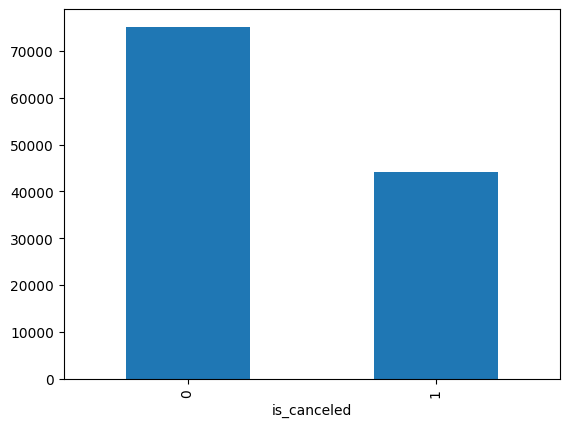

In [15]:
#cantidad de personas que cancela
canceled=df['is_canceled'].value_counts()
print(canceled)
#visualizar la variable canceled
df['is_canceled'].value_counts().plot(kind="bar")

In [16]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


In [32]:
df_no_numeric = df.select_dtypes(exclude=['number'])
df_no_numeric.columns

Index(['arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date'],
      dtype='object')

## Enconding Process

In [34]:
from sklearn import preprocessing

label_encoder= preprocessing.LabelEncoder()
for i in df_no_numeric.columns:
    df[i]=label_encoder.fit_transform(df[i])


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int64  
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int64  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [35]:
#dividir el dataframe en testing y training
X = df[['hotel', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date']]
y = df[['is_canceled']]
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7, test_size=0.3)

In [36]:
#concatenar los dataframe de X_train y y_train
df_train= pd.concat([X_train, y_train], axis=1)

In [37]:
df_train.head(3)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_canceled
93200,0,69,2016,5,30,17,1,0,2,1.0,...,0,9.0,0,2,123.3,0,2,1,290,0
14080,1,1,2017,3,5,4,1,1,2,0.0,...,0,NaN,0,2,48.0,0,3,1,808,0
10408,1,312,2017,7,10,5,2,5,2,0.0,...,0,298.0,0,3,30.0,0,0,0,62,1


In [38]:
count_class_0, count_class_1 =df_train.is_canceled.value_counts()

df_class_0 = df_train[df_train['is_canceled'] == 0]
df_class_1 = df_train[df_train['is_canceled'] == 1]

In [39]:
print(count_class_0)
print(len(df_class_0))
print(count_class_1)
print(len(df_class_1))

52662
52662
30911
30911


In [40]:
# undersampling
df_class_0_under = df_class_0.sample(count_class_1, random_state=83500)
df_train_under= pd.concat([df_class_0_under, df_class_1], axis=0)

In [41]:
#oversampling
df_class_1_over= df_class_1.sample(count_class_0, replace=True)
df_train_over=pd.concat([df_class_0, df_class_1_over], axis=0)


<Axes: title={'center': 'Cantidad (target)'}, xlabel='is_canceled'>

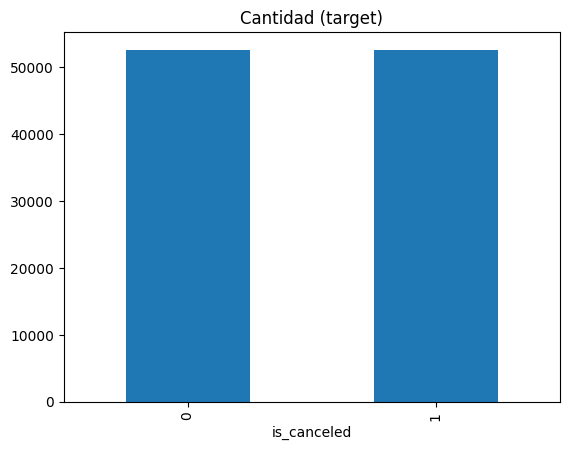

In [42]:
df_train_over.is_canceled.value_counts().plot(kind='bar', title='Cantidad (target)')

<Axes: title={'center': 'Cantidad (target)'}, xlabel='is_canceled'>

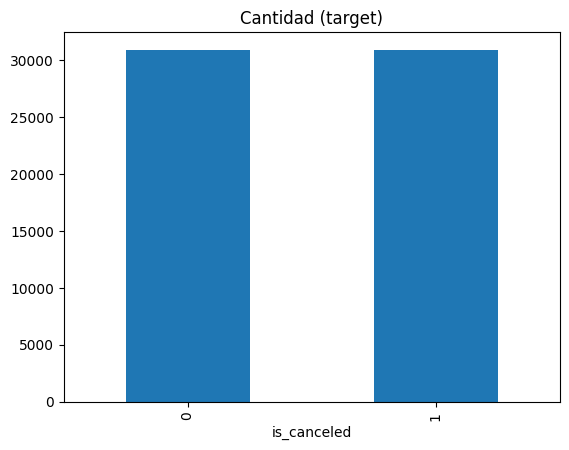

In [43]:
df_train_under.is_canceled.value_counts().plot(kind='bar', title='Cantidad (target)')

## Análsis de variables cuantitativas
* lead_time: tiene una desviación muy alta, y un máximo demasiado alejado, quizas los cuartiles son una problema también
* arrival_date_year: no tiene interpretación, pues oscila entre 2016 y 2017
* arrival_date_week_number: tiene un balance normal, no hay nada de malo
* arrival_date_day_of_month: también parece que tiene todo bien
* stays_in_weekend_nights: tiene una varianza más alta que el promedio y un máximo atipico
* adults: tiene un valor atipico, pero parece no afectar mucho
* children: tiene valores atipicos lo cual afecta la varianza
* is_repeated_guest: valores que identifican si repite

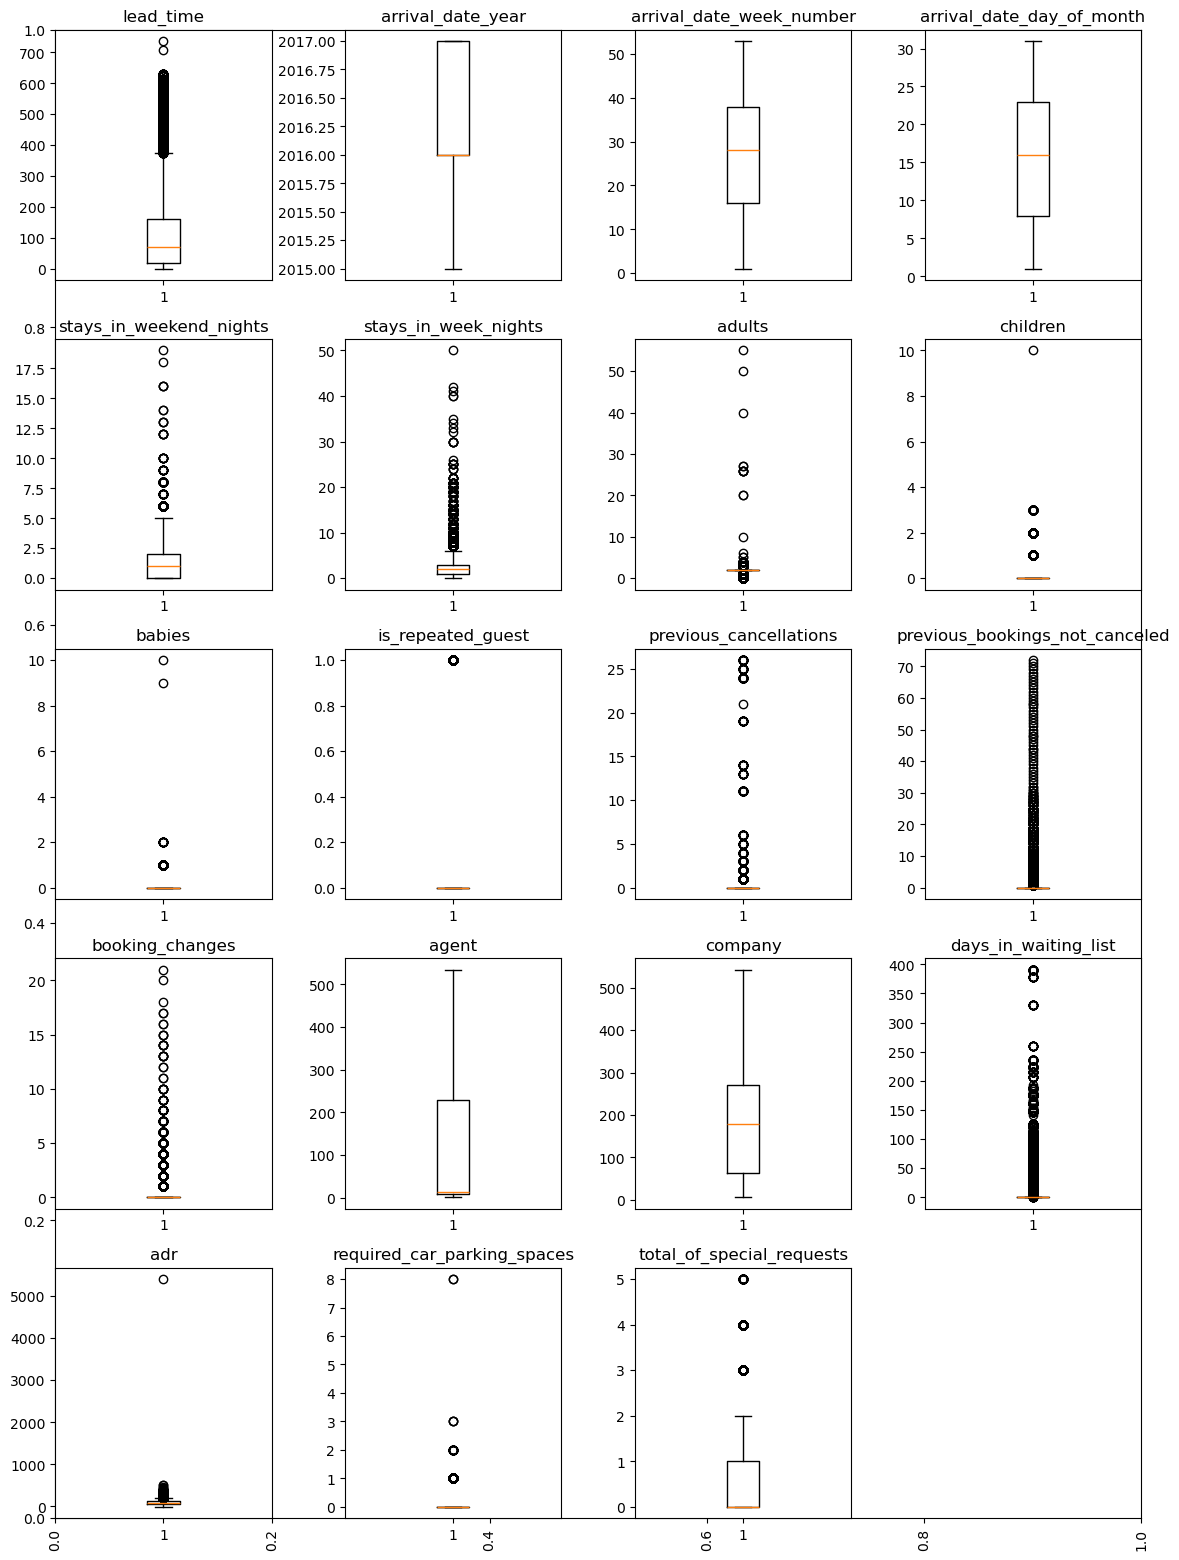

In [16]:
valores = df[['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 
              'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 
              'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 
              'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 
              'required_car_parking_spaces', 'total_of_special_requests']]

plt.figure(figsize=(12, 16))  # Tamaño ajustado para acomodar varios gráficos
plt.xticks(rotation=90)      # Rotar etiquetas de eje X para mejor legibilidad

# Crear gráficos de caja individuales
for i, column in enumerate(valores.columns):
    plt.subplot(5, 4, i + 1)  # Crear una cuadrícula 5x4 de subplots
    plt.boxplot(valores[column].dropna())  # Ignorar valores NaN
    plt.title(column)

plt.tight_layout()  # Ajustar diseño para evitar solapamiento
plt.show()

## Limpieza
+ Vamos a limpiar los datos con diferentes metodos para probar cada uno

In [22]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
columna_num=['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 
              'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 
              'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 
              'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 
              'required_car_parking_spaces', 'total_of_special_requests']
df[columna_num] = imputer.fit_transform(df[[columna_num]])


KeyError: "None of [Index([('lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests')], dtype='object')] are in the [columns]"

# Aplicando Modelos de Clasificación

### Aplicamos DecisionTree

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss

model=DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

accuracy=accuracy_score(y_test, y_pred)
print(f'el acurracy es {accuracy * 100}')
ll=log_loss(y_test, y_pred)
print(f'el log loss es {ll}')


el acurracy es 100.0
el log loss es 2.2204460492503136e-16


### Aplicamos XGBoots

In [45]:
import xgboost as xgb

In [46]:
modelxgb=xgb.XGBClassifier()
modelxgb.fit(X_train, y_train)
y_pred_xgb=modelxgb.predict(X_test)
accuracy=accuracy_score(y_test, y_pred_xgb)
print(f'el acurracy es {accuracy * 100}')
ll=log_loss(y_test, y_pred_xgb)
print(f'el log loss es {ll}')

el acurracy es 100.0
el log loss es 2.2204460492503136e-16
